<a href="https://colab.research.google.com/github/dantae74/tensorflow/blob/main/02-auto-graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### @tf.function
* 자동으로 그래프를 생성(Auto Graph)
* 그래프로 변환하여 사용 -> GPU 연산 가능
* 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능
* 원본함수가 필요하다면 (tf.fucntion).python_function()

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
t1 = tf.Variable([1.,2.,3.])
t2 = tf.Variable([4.,5.,6.])

with tf.GradientTape() as tape:
    t3 = t1 * t2

gradients = tape.gradient(t3, [t1, t2]) # t1, t2 로 t3를 편미분, t3를 t1으로 편미분하면 t2, t3를 t2로 편미분 하면 t1 임
print(gradients)
print(gradients[0])
print(gradients[1])

[<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4., 5., 6.], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>]
tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


# Linear Regression

In [3]:
x_data = tf.random.normal(shape=(1000,), dtype=tf.float32)
y_data = 3 * x_data + 1

print(x_data.dtype, y_data.dtype)

<dtype: 'float32'> <dtype: 'float32'>


In [4]:
w = tf.Variable(-1.)
b = tf.Variable(-1.)

LR = 0.01
EPOCHS = 10

w_trace, b_trace = [], []

for epoch in range(EPOCHS):
    for x, y in zip(x_data, y_data):
        with tf.GradientTape() as tape:
            prediction = w*x + b
            loss = (prediction - y) ** 2
        
        gradients = tape.gradient(loss, [w, b])
        
        w_trace.append(w.numpy())
        b_trace.append(b.numpy())
        
        w = tf.Variable(w - LR*gradients[0])
        b = tf.Variable(b - LR*gradients[1])

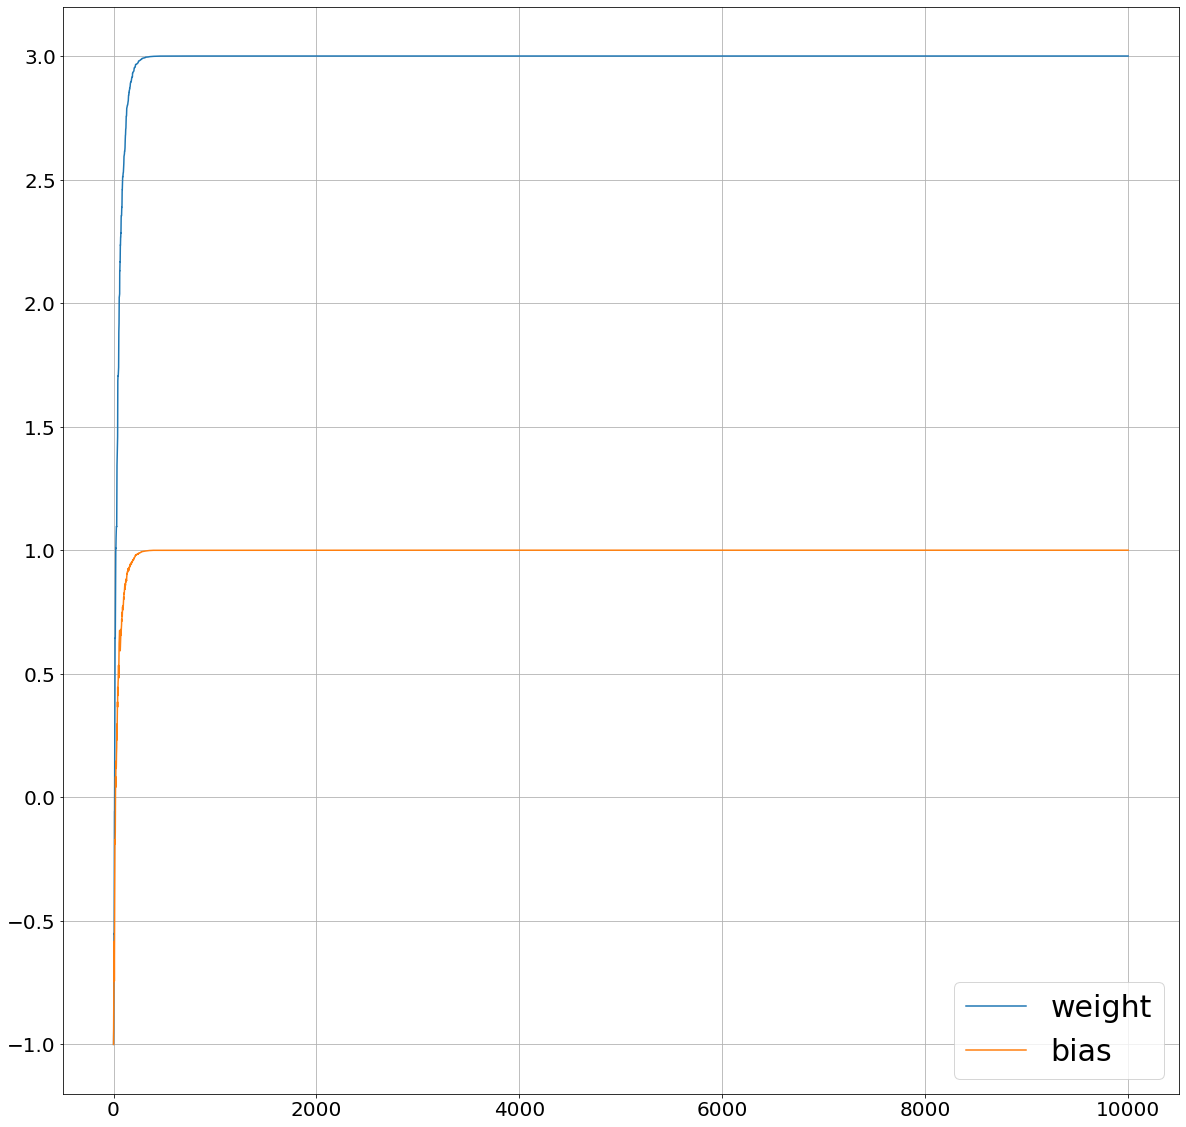

In [5]:
# print('w_trace', w_trace)
# print('b_trace', b_trace)

fig, ax = plt.subplots(figsize=(20,20))
ax.plot(w_trace, label='weight')
ax.plot(b_trace, label='bias')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()